In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('diabetes.csv')
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
missing_values = data.isnull().sum()
missing_values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
#here few misconception is there lke BMI can not be zero, BP can't be zero, glucose, insuline can't be zero so lets try to fix it
# now replacing zero values with the mean of the column

data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

#pregrnancies data also look skewed towards left because of some outliers, let's remove them
# q = data['Pregnancies'].quantile(0.95)
# data_cleaned = data[data['Pregnancies']<q]

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [6]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=42)

In [8]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [9]:
sigmoid(0)

0.5

In [10]:
def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        z = np.dot(x[i],w) + b
        f = sigmoid(z)
        cost += -y[i] * (np.log(f)) - ((1-y[i]) * np.log(1-f))

    total_cost = cost/m
    return total_cost

In [11]:
def compute_gradient_logistic(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.0

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i], w) + b)
        err_i = f_wb_i - y[i]
        dj_db += err_i
        for j in range(n):
            dj_dw[j] += err_i * X[i, j]
    
    dj_dw /= m
    dj_db /= m
        
    return dj_db, dj_dw


# Define the compute_gradient_logistic function
# def compute_gradient_logistic(X, y, w, b):
#     m = X.shape[0]
#     z = np.dot(X, w) + b
#     f = sigmoid(z)
#     error = f - y
#     dj_dw = np.dot(X.T, error) / m
#     dj_dw = np.dot(X.T, error) / m
#     dj_db = np.sum(error) / m
#     return dj_db, dj_dw


In [12]:
import math

# Define the gradient_descent function
def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
    J_history = []
    w = w_in
    b = b_in
    
    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        cost = compute_cost(X, y, w, b)  
        
        # Check for NaN values in the cost before appending and printing
        if not np.isnan(cost):
            J_history.append(cost)

        # if i < 100000:  
        #     J_history.append(cost)

        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {cost:.2f}")
        
    return w, b, J_history

In [13]:
w_init = np.zeros_like(X_train[0])
b_init = 0.
alpha = 0.0001
iters = 10000

# Call the gradient_descent function
w_out, b_out, J_hist = gradient_descent(X_train, y_train, w_init, b_init, alpha, iters) 

print(f"\nUpdated parameters: w:{w_out}, b:{b_out}")




Iteration    0: Cost 0.67
Iteration 1000: Cost 0.58
Iteration 2000: Cost 0.58
Iteration 3000: Cost 0.58
Iteration 4000: Cost 0.58


Total not nan bvalues: 10000


Text(0, 0.5, 'loss value')

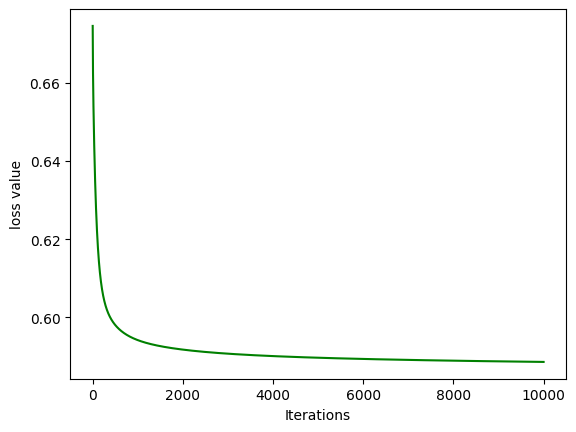

In [ ]:

print(f"Total not nan bvalues: {len(J_hist)}")
J = np.array(J_hist)

plt.plot(range(J.shape[0]),J,color = 'g')
plt.xlabel('Iterations')
plt.ylabel('loss value')

In [ ]:
def predict(x):
    z = np.dot(x, w_out) + b_out
    probabilities = sigmoid(z)
    predictions = (probabilities >= 0.5).astype(int)
    return predictions


# In this version of the predict function, probabilities contains the output of the sigmoid function for each sample, and then predictions is obtained by thresholding these probabilities using (probabilities >= 0.5). The .astype(int) converts True and False values to 1 and 0, respectively.


In [ ]:
# predict(X_test)


In [ ]:
def accuracy(predictions, actual):
    correct = np.sum(predictions == actual)
    actual = len(predictions)
    accuracy = correct /actual
    return accuracy 


accuracy(predict(X_train), y_train)
print(f"Training accuracy of model: {accuracy(predict(X_train), y_train)}")
print(f"Training accuracy of model: {accuracy(predict(X_test), y_test)}")

Training accuracy of model: 0.6837606837606838
Training accuracy of model: 0.7233333333333334


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=5)
X_train_selected = selector.fit_transform(X, y)
print(X_train_selected[0:6])

[[  6.         148.          79.79947917  33.6         50.        ]
 [  1.          85.          79.79947917  26.6         31.        ]
 [  8.         183.          79.79947917  23.3         32.        ]
 [  1.          89.          94.          28.1         21.        ]
 [  0.         137.         168.          43.1         33.        ]
 [  5.         116.          79.79947917  25.6         30.        ]]


In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


# Using Sklearn library

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

c:\Users\mayur dabade\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score

train_pred = model.predict(X_train)
accuracy = accuracy_score(train_pred, y_train)

# Print the accuracy
print(f"Accuracy of train dataset: {accuracy:.2f}")


test_pred = model.predict(X_test)
accuracy = accuracy_score(test_pred, y_test)
print(f"Accuracy of test dataset: {accuracy:.2f}")

Accuracy of train dataset: 0.78
Accuracy of test dataset: 0.75


# Finding best random state value

In [ ]:
from sklearn.model_selection import train_test_split
tr = []
ts = []
for i in range(20,40):
   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/100, random_state=16)

    # train_pred = model.predict(X_train)
    # accuracy = accuracy_score(train_pred, y_train)

    # print(f"for i={i} Accuracy of train dataset: {accuracy:.2f}")


    test_pred = model.predict(X_test)
    accuracy = accuracy_score(test_pred, y_test)
    print(f"for i={i} Accuracy of test dataset: {accuracy:.2f}")
    ts.append(accuracy)

print(max(ts))

for i=20 Accuracy of test dataset: 0.79
for i=21 Accuracy of test dataset: 0.80
for i=22 Accuracy of test dataset: 0.79
for i=23 Accuracy of test dataset: 0.80
for i=24 Accuracy of test dataset: 0.79
for i=25 Accuracy of test dataset: 0.79
for i=26 Accuracy of test dataset: 0.78
for i=27 Accuracy of test dataset: 0.78
for i=28 Accuracy of test dataset: 0.78
for i=29 Accuracy of test dataset: 0.78
for i=30 Accuracy of test dataset: 0.77
for i=31 Accuracy of test dataset: 0.77
for i=32 Accuracy of test dataset: 0.77
for i=33 Accuracy of test dataset: 0.77
for i=34 Accuracy of test dataset: 0.77
for i=35 Accuracy of test dataset: 0.77
for i=36 Accuracy of test dataset: 0.77
for i=37 Accuracy of test dataset: 0.77
for i=38 Accuracy of test dataset: 0.76
for i=39 Accuracy of test dataset: 0.76
0.8022598870056498


In [ ]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardization 

scaler = StandardScaler() 
Standardized_data = scaler.fit_transform(X_train)
print(Standardized_data)

# Normalization
# scaler = MinMaxScaler() 
# Normalized_data = scaler.fit_transform(df.iloc[:,:-2])



[[ 0.68748321  0.0749093  -0.04317291 ... -0.73879954 -0.31237138
  -0.35647526]
 [-1.12855898  0.58879547 -0.62393801 ...  1.35371742 -0.12729868
  -0.79759219]
 [-0.22053789  0.04279141  2.27988748 ...  3.40438403  1.19171149
  -0.97403896]
 ...
 [ 0.68748321 -0.34262322 -0.70690445 ...  0.18190792 -0.62963886
  -0.79759219]
 [ 1.5955043   1.35962473  0.9524244  ... -0.29239592  1.04776606
  -0.0918051 ]
 [-1.12855898  1.29538895  0.28869286 ...  2.33022533 -0.32412202
  -0.62114542]]


In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
